The idea of functions:

 -Scale the word_counts and language_words with_frequency by the highest frequent word

In [120]:
import json
from starlette.datastructures import URL

def lang_confidence_score(word_counts, language_words_with_frequency):
    # zakładam że language_words_with_frequency to lista zagęszszona
    score = 0
    for word , freq in language_words_with_frequency:
        count_in_text = word_counts.get(word,0)
        # if count_in_text is None or freq is None:
        #     continue
        score += count_in_text * freq
    sum = 0
    for word , count in word_counts.items():
        sum += count
    return score/sum

I choose english (the language which was used for writing pokemon wiki) , french and spanish


In [132]:
import wordfreq
def get_top_words(number):
    ListOfWordsInEnglish = wordfreq.top_n_list(n = number , lang= 'en')
    ListOfWordsInFrench = wordfreq.top_n_list(n = number , lang='fr')
    ListOfWordsInSpanish = wordfreq.top_n_list(n = number , lang= 'es')
    ListOfWordsInEnglishWithFreq = []
    ListOfWordsInFrenchWithFreq = []
    ListOfWordsInSpanishWithFreq = []
    for i in range(number):
        ListOfWordsInEnglishWithFreq.append([
            ListOfWordsInEnglish[i],
            wordfreq.word_frequency(ListOfWordsInEnglish[i], lang='en')
        ])
        ListOfWordsInFrenchWithFreq.append([
            ListOfWordsInFrench[i],
            wordfreq.word_frequency(ListOfWordsInFrench[i], lang='fr')
        ])
        ListOfWordsInSpanishWithFreq.append([
            ListOfWordsInSpanish[i],
            wordfreq.word_frequency(ListOfWordsInSpanish[i], lang='es')
        ])
    return [ListOfWordsInEnglishWithFreq, ListOfWordsInFrenchWithFreq, ListOfWordsInSpanishWithFreq]
print(get_top_words(5))

[[['the', 0.0537], ['to', 0.0269], ['and', 0.0257], ['of', 0.0251], ['a', 0.0229]], [['de', 0.0479], ['la', 0.0269], ['le', 0.0224], ['et', 0.0204], ['l', 0.0182]], [['de', 0.0646], ['la', 0.0363], ['que', 0.0331], ['el', 0.0282], ['en', 0.0282]]]


In [106]:
from wiki_scraper import Scraper
import json

dictionery = []

obiekt = Scraper(use_local_html_file_instead=True)
if obiekt.count_words('Team Rocket') is None:
    print("Nie powiódł się count-words")
    raise Exception
with open("./word-count.json" , 'r' , encoding='utf-8') as file:
    word_count = json.load(file)
dictionery.append(word_count)
count = 0
for word in word_count:
    count += word_count[word]
assert count >= 5000
print(count)

8246


In [107]:
from wiki_scraper import Scraper
import json
URL = "https://bulbapedia.bulbagarden.net/wiki"
obiekt2 = Scraper(URL)
if obiekt2.count_words('Charmander') is None:
    print("Nie powiódł się count-words")
    raise Exception
with open("./word-count.json", 'r', encoding='utf-8') as file:
    word_count2 = json.load(file)
dictionery.append(word_count2)
count = 0
for word in word_count2:
    count += word_count2[word]
print(count)

7486


In [108]:
from wiki_scraper import Scraper
import json
URL = "https://bulbapedia.bulbagarden.net/wiki"
obiekt3 = Scraper(URL)
if obiekt3.count_words('List of Pokémon by height') is None:
    print("Nie powiódł się count-words")
    raise Exception
with open("./word-count.json", 'r', encoding='utf-8') as file:
    word_count3 = json.load(file)
dictionery.append(word_count3)
count = 0
for word in word_count3:
    count += word_count3[word]
print(count)

2864


In [109]:
from wiki_scraper import Scraper
import json
obiekt4 = Scraper(use_local_html_file_instead=True)
if obiekt4.count_words("Charles de Gaulle") is None:
    print("Nie powiódł się count-words")
    raise Exception
with open("./word-count.json", 'r', encoding='utf-8') as file:
    word_count4 = json.load(file)
count = 0
dictionery.append(word_count4)
for word in word_count4:
    count += word_count4[word]
print(count)


2715


In [110]:
from wiki_scraper import Scraper
import json
obiekt5 = Scraper(use_local_html_file_instead=True)
if obiekt5.count_words("Da Vinci") is None:
    print("Nie powiódł się count-words")
    raise Exception
with open("./word-count.json", 'r', encoding='utf-8') as file:
    word_count5 = json.load(file)
dictionery.append(word_count5)
count = 0
for word in word_count5:
    count += word_count5[word]
print(count)

1587


In [111]:
k = [3 , 10 , 100 , 1000]

In [134]:
freqs = get_top_words(k[-1])
scores = []
for k_val in k:
    en_scores_k = []
    fr_scores_k = []
    es_scores_k = []
    for word_dict in dictionery:
        en_scores_k.append(lang_confidence_score(word_dict, freqs[0][:k_val]))
        fr_scores_k.append(lang_confidence_score(word_dict, freqs[1][:k_val]))
        es_scores_k.append(lang_confidence_score(word_dict, freqs[2][:k_val]))
    scores.append([
        en_scores_k,
        fr_scores_k,
        es_scores_k
    ])

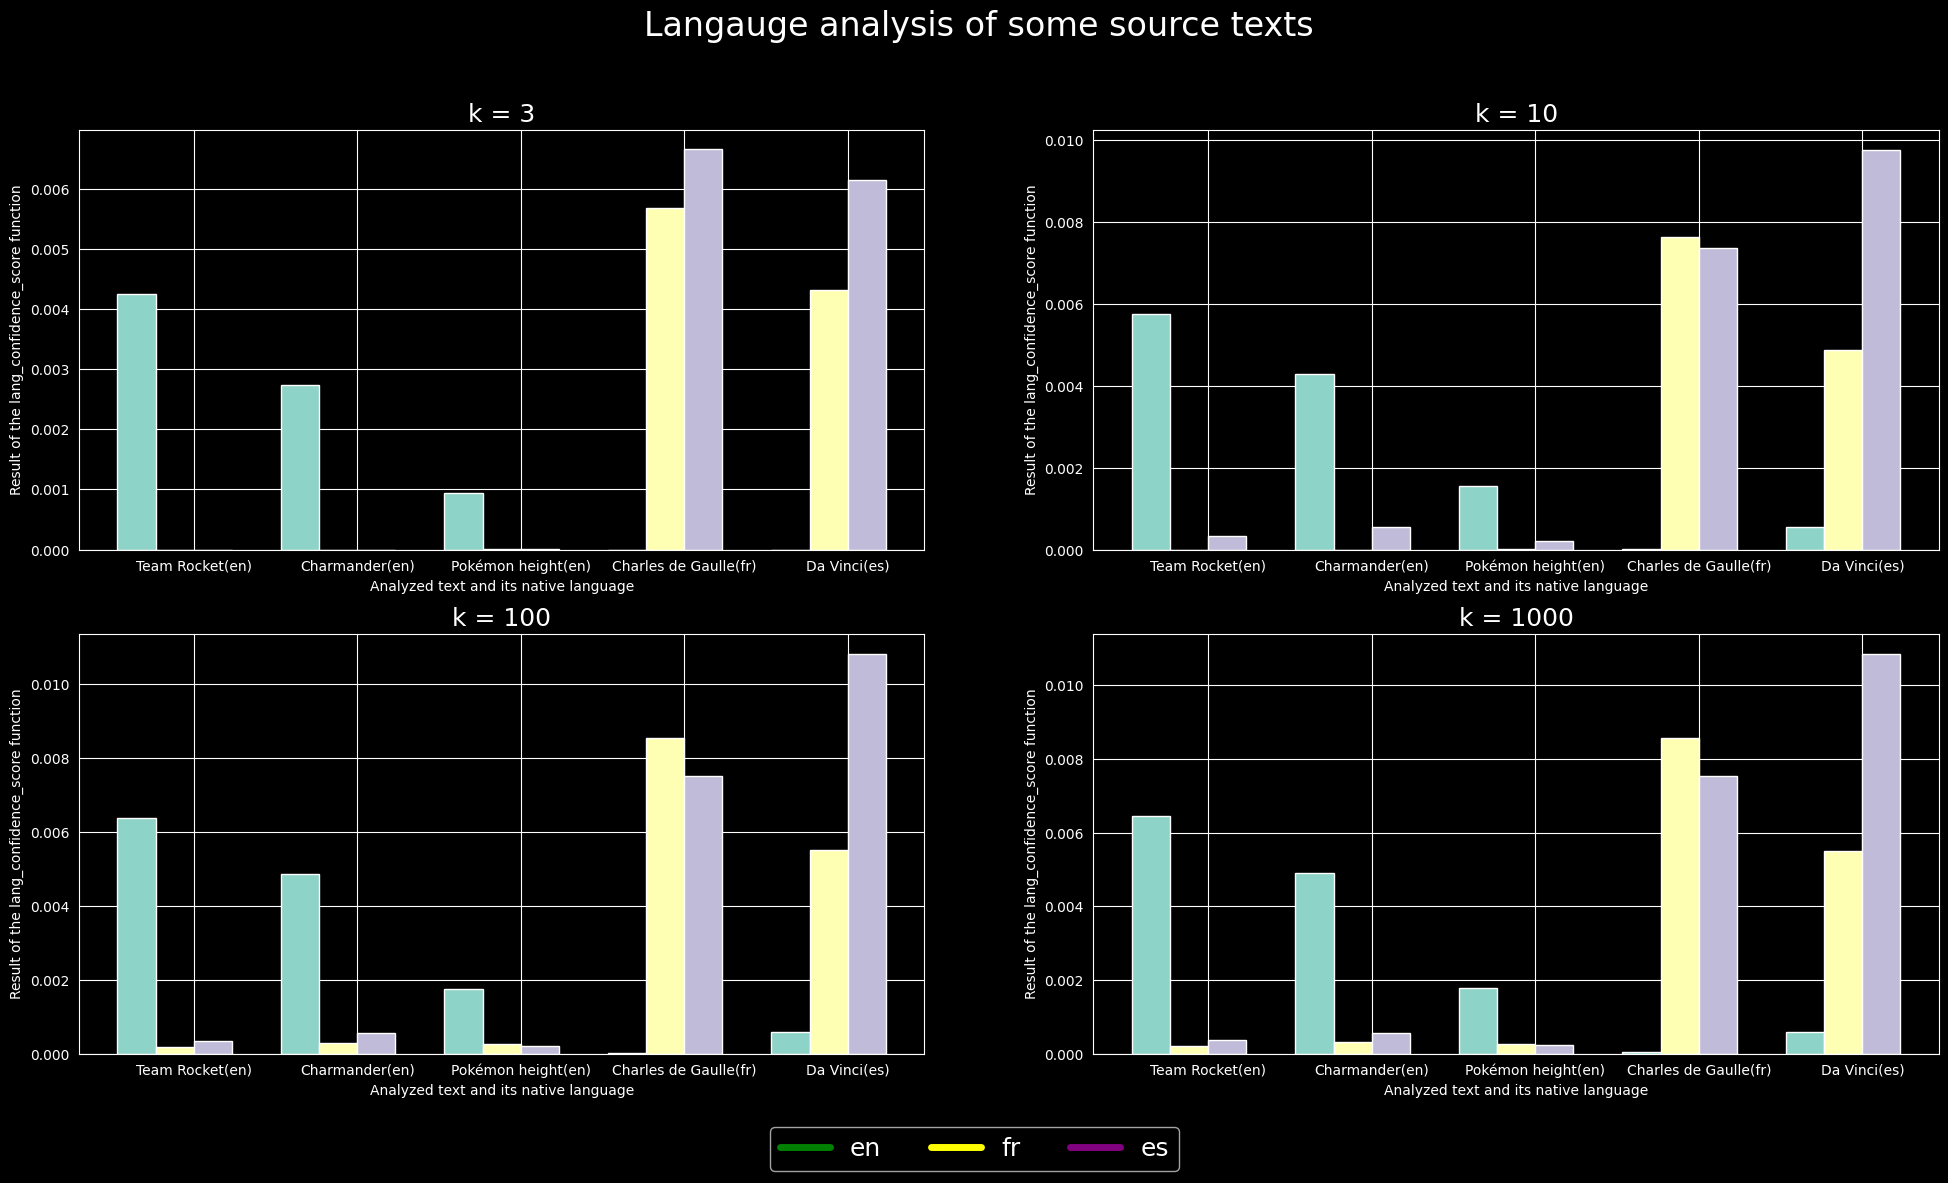

In [139]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import numpy as np

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(24, 12)
fig.suptitle("Langauge analysis of some source texts", fontsize=24)

legend_elements = [
    Line2D([0], [0], color="green", lw=5, label="en"),
    Line2D([0], [0], color="yellow", lw=5, label="fr"),
    Line2D([0], [0], color="purple", lw=5, label="es")
]
fig.legend(handles=legend_elements, loc="lower center", ncol=4, fontsize=18)

width_cluster = 0.7
width_bar = width_cluster / 3
index = ["Team Rocket(en)", "Charmander(en)", "Pokémon height(en)", "Charles de Gaulle(fr)", "Da Vinci(es)"]

x = np.arange(len(index))

for axs_no in range(4):
    axs[axs_no // 2, axs_no % 2].set_title(f"k = {k[axs_no]}", fontsize=18)
    axs[axs_no // 2, axs_no % 2].set_xlabel("Analyzed text and its native language")
    axs[axs_no // 2, axs_no % 2].set_ylabel("Result of the lang_confidence_score function")
    for n in range(3):
        x_pos = x + (width_bar * n) - width_cluster / 2
        axs[axs_no // 2, axs_no % 2].bar(x_pos, scores[axs_no][n], width_bar, align="edge", tick_label=index)